In [1]:
#importing libraries for EDA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Problem Statement

The company wants to know which holiday period generates the highest revenue so they adjust their marketting budget accrodingly.

In [2]:
#import the sales data to our jupyter notebook for data analysis.
sales = pd.read_table('Ecommerce_Data.txt', delimiter = ',')

sales.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour
0,439570,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453.0,United Kingdom,2011-11-04,12
1,387281,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098.0,United Kingdom,2011-10-10,10
2,337863,566482,22508,DOORSTOP RETROSPOT HEART,12,3.75,16609.0,United Kingdom,2011-09-13,9
3,57628,541215,22662,LUNCH BAG DOLLY GIRL DESIGN,10,1.65,14329.0,United Kingdom,2011-01-14,13
4,330897,565930,POST,POSTAGE,5,18.00,12685.0,France,2011-09-08,10


In [3]:
## dropped the first column in oour dataframe since we wouldnt need it.
sales.drop(['Unnamed: 0'], axis=1, inplace= True)

In [4]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour
0,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453.0,United Kingdom,2011-11-04,12
1,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098.0,United Kingdom,2011-10-10,10
2,566482,22508,DOORSTOP RETROSPOT HEART,12,3.75,16609.0,United Kingdom,2011-09-13,9
3,541215,22662,LUNCH BAG DOLLY GIRL DESIGN,10,1.65,14329.0,United Kingdom,2011-01-14,13
4,565930,POST,POSTAGE,5,18.00,12685.0,France,2011-09-08,10


In [5]:
## I introduced a sales column into our sales dataframe by multiplying 'quantity' purchased by the Unit price
sales['Sales'] = sales['Quantity']* sales['UnitPrice']
sales.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour,Sales
0,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453.0,United Kingdom,2011-11-04,12,3.25
1,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098.0,United Kingdom,2011-10-10,10,89.40
2,566482,22508,DOORSTOP RETROSPOT HEART,12,3.75,16609.0,United Kingdom,2011-09-13,9,45.00
3,541215,22662,LUNCH BAG DOLLY GIRL DESIGN,10,1.65,14329.0,United Kingdom,2011-01-14,13,16.50
4,565930,POST,POSTAGE,5,18.00,12685.0,France,2011-09-08,10,90.00


### Data Auditing


I need to know the shape of my dataframe, number of datasets, null values and the type of datasets I'm workig with.

In [6]:
sales.shape

(81601, 10)

In [7]:
sales.isnull().any().any()

False

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81601 entries, 0 to 81600
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    81601 non-null  object 
 1   StockCode    81601 non-null  object 
 2   Description  81601 non-null  object 
 3   Quantity     81601 non-null  int64  
 4   UnitPrice    81601 non-null  float64
 5   CustomerID   81601 non-null  float64
 6   Country      81601 non-null  object 
 7   Date         81601 non-null  object 
 8   Hour         81601 non-null  int64  
 9   Sales        81601 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 6.2+ MB


Since our sales dataset didn't have the corresponidng holidays,

It is imperative that I import a new dataset with dates and its corresponding holidays

In [9]:
## reading the holiday data
holidays = pd.read_csv('US Holiday Dates.csv')

In [10]:
holidays.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


Merging the sales data to the holiday data to create one dataframe

In [11]:
## merging both dataframe with common key: Date
newsales= pd.merge(sales,holidays, on= 'Date', how='left')

##Dropped some columns in our new dataframe since it wouldn't be needed.
newsales.drop(['Hour','WeekDay','Month','Day','Year'], axis=1, inplace= True)
newsales.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Sales,Holiday
0,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453.0,United Kingdom,2011-11-04,3.25,NaN
1,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098.0,United Kingdom,2011-10-10,89.40,Columbus Day
2,566482,22508,DOORSTOP RETROSPOT HEART,12,3.75,16609.0,United Kingdom,2011-09-13,45.00,NaN
3,541215,22662,LUNCH BAG DOLLY GIRL DESIGN,10,1.65,14329.0,United Kingdom,2011-01-14,16.50,NaN
4,565930,POST,POSTAGE,5,18.00,12685.0,France,2011-09-08,90.00,NaN


### Data Analysis

In [12]:
##aggregate the holiday column in terms of sales
aggsales= newsales.groupby('Holiday').sum()['Sales'].reset_index()
aggsales= aggsales.sort_values('Sales', ascending = False).reset_index(drop=True)
aggsales.head(10)

,Holiday,Sales
0,Thanksgiving Eve,13492.77
1,Columbus Day,8868.29
2,Veterans Day,7032.45
3,4th of July,6776.75
4,Labor Day,6733.90
5,Thanksgiving Day,6232.85
6,Washington's Birthday,5796.19
7,Valentine’s Day,4896.18
8,Juneteenth,4431.40
9,Labor Day Weekend,3636.26


### Visualising our aggregated data and deriving insights

I plotted a horizontal bar chart to visualise each holiday and its respective sales that it generated

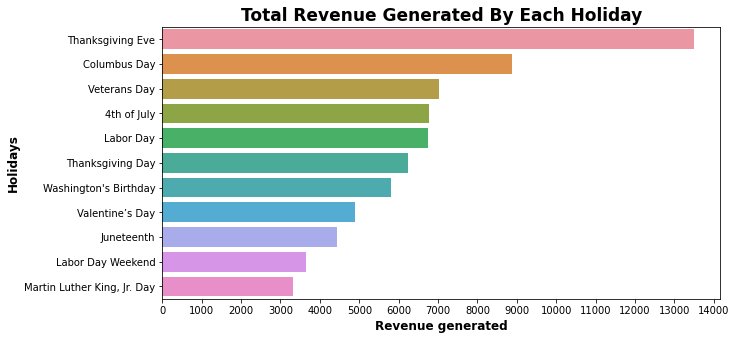

In [13]:
plt.figure(figsize= (10,5))
sns.barplot(x=aggsales['Sales'], y=aggsales['Holiday'])
plt.xticks(np.arange(0,15000,1000))
plt.xlabel('Revenue generated',fontsize = 12, weight ='bold')
plt.ylabel('Holidays',fontsize = 12, weight='bold')
plt.title('Total Revenue Generated By Each Holiday', fontsize= 17, weight='bold')
plt.show()

### Insight



* Based on the analysis, Thanksgiving Eve generated the higest revenue of any holiday period

### Recommendation

* Allocating a relatively larger percentage of the marketting budget during the lead up to the holidays may produce higher revenue 

## Further analysis on 'Thanksgiving Eve' holiday.

We can also further explore the top ten (10) products that were sold the most on Thanksgiving Eve holiday.

In [14]:
thanksgivingeve = newsales.loc[newsales['Holiday']== 'Thanksgiving Eve']
thanksgivingeve.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Sales,Holiday
52,578118,15039,SANDALWOOD FAN,10,0.85,12955.0,United Kingdom,2011-11-23,8.50,Thanksgiving Eve
157,578305,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",36,2.55,14088.0,United Kingdom,2011-11-23,91.80,Thanksgiving Eve
195,578260,23313,VINTAGE CHRISTMAS BUNTING,10,4.95,17469.0,United Kingdom,2011-11-23,49.50,Thanksgiving Eve
250,578265,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13018.0,United Kingdom,2011-11-23,83.40,Thanksgiving Eve
382,578292,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,3,2.95,13174.0,United Kingdom,2011-11-23,8.85,Thanksgiving Eve


In [15]:
aggthankseve= thanksgivingeve.groupby('Description').sum()['Sales'].reset_index()
aggthankseve= aggthankseve.sort_values('Sales', ascending= False).head(10).reset_index(drop=True)
aggthankseve.head(10)

,Description,Sales
0,WHITE HANGING HEART T-LIGHT HOLDER,434.44
1,HEART FILIGREE DOVE LARGE,313.20
2,LUNCH BAG SPACEBOY DESIGN,294.95
3,CHILDRENS CUTLERY POLKADOT PINK,274.15
4,ICE CREAM PEN LIP GLOSS,249.60
5,WALL ART STOP FOR TEA,240.75
6,VICTORIAN SEWING BOX LARGE,229.95
7,SET/3 VANILLA SCENTED CANDLE IN BOX,228.60
8,DOORMAT FANCY FONT HOME SWEET HOME,206.49
9,SET 7 BABUSHKA NESTING BOXES,200.60


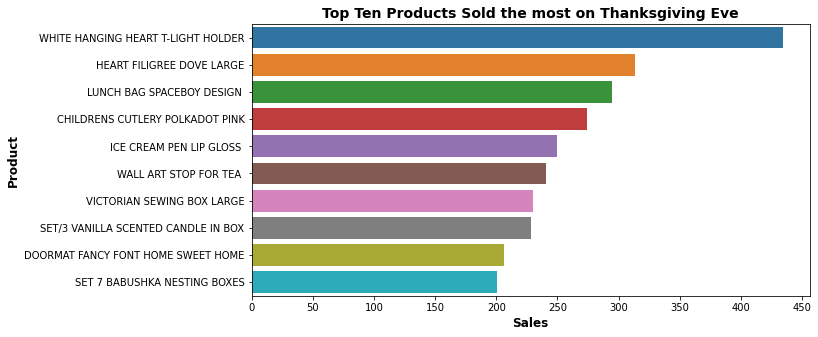

In [16]:
plt.figure(figsize= (10,5))
sns.barplot(x=aggthankseve['Sales'], y=aggthankseve['Description'])
plt.xticks(np.arange(0,500,50))
plt.xlabel('Sales',fontsize = 12, weight ='bold')
plt.ylabel('Product',fontsize = 12, weight='bold')
plt.title('Top Ten Products Sold the most on Thanksgiving Eve', fontsize= 14, weight='bold')
plt.show()

## Insights

* Based on the analysis, "White Hanging Heart T-light Holder" product was the most sold on Thanksgiving Eve

## Recommendation

* Focusing and allocating a relatively larger portion of the marketting budget on the top ten (10) products may produce higher revenue. 